# Normalization and Linear Model

In [33]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from matplotlib import pyplot as plt


In [34]:
%matplotlib inline

In [67]:
# import all text files and combine in 1 data frame

baby = []
a = 1880


while a <= 2017:
    fl = str('names/yob' + str(a) + '.txt')
    bth = pd.read_csv(fl, names=['name', 'gender', 'cnt'])
    bth.set_index('name', inplace=True)
    bth['year'] = int(a) #birth year
    bth['cntTB'] = bth['cnt'].sum() #sum of all births in one year
    baby.append(bth)
    a = a + 1
    
baby = pd.concat(baby)

#baby['name'] = baby.index # es wird eine Variable mit dem Inhalt von Index erstellt

baby.head(10)

    

,gender,cnt,year,cntTB
name,,,,
Mary,F,7065,1880,201484
Anna,F,2604,1880,201484
Emma,F,2003,1880,201484
Elizabeth,F,1939,1880,201484
Minnie,F,1746,1880,201484
Margaret,F,1578,1880,201484
Ida,F,1472,1880,201484
Alice,F,1414,1880,201484
Bertha,F,1320,1880,201484


In [68]:
baby.shape


(1924665, 4)

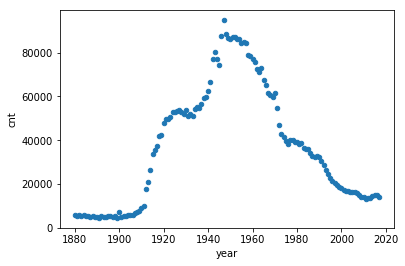

In [69]:
# filter for male boys called james

james = baby[baby['gender'] == 'M'].loc['James'] 
james.plot.scatter('year', 'cnt')

In [75]:
births = baby.groupby('year')['cnt'].sum()
births.head(5)

year
1880    201484
1881    192696
1882    221533
1883    216946
1884    243462
Name: cnt, dtype: int64

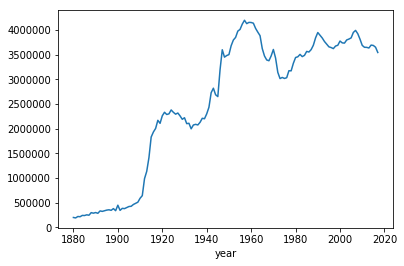

In [71]:
# normalize the data by the total number of births

## total number of all births per year

births = baby.groupby('year')['cnt'].sum()
births.plot()

In [72]:
# merge von data frame (james) & series (births)
# --> index muss in beiden gleich sein 

james.sort_values('year', inplace=True)
james.set_index('year', inplace=True)
james.head(3)


,gender,cnt,cntTB
year,,,
1880,M,5927,201484
1881,M,5441,192696
1882,M,5892,221533


In [76]:
james['totalB'] = births
james.head()

,gender,cnt,cntTB,totalB
year,,,,
1880,M,5927,201484,201484
1881,M,5441,192696,192696
1882,M,5892,221533,221533
1883,M,5223,216946,216946
1884,M,5693,243462,243462


In [77]:
james['totalbirths'] = births

In [78]:
james.head()

,gender,cnt,cntTB,totalB,totalbirths
year,,,,,
1880,M,5927,201484,201484,201484
1881,M,5441,192696,192696,192696
1882,M,5892,221533,221533,221533
1883,M,5223,216946,216946,216946
1884,M,5693,243462,243462,243462


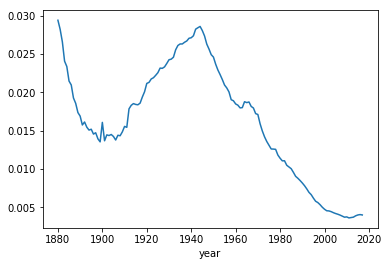

In [56]:
james['norm'] = james['cnt'] / james['totalB']
james['norm'].plot()